
Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] 5 7 4 1 3 2 4 5 4 1 9 6

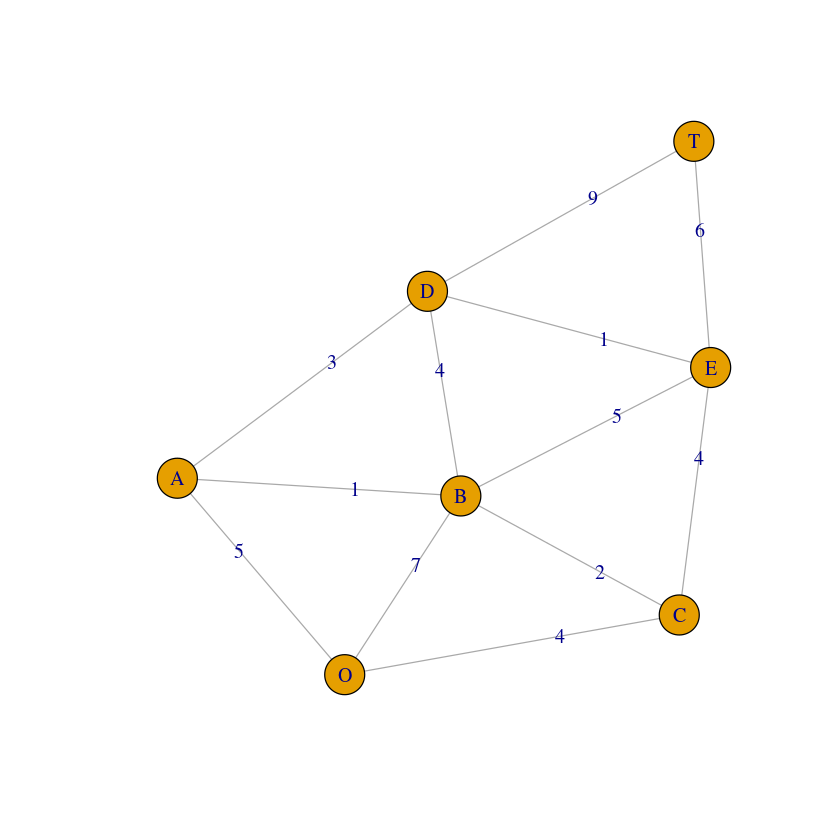

In [2]:
# Import library
library(igraph)
# Read the file and build a graph from a dataframe
# https://drive.google.com/open?id=0B-dmEvN59Z2Zdlg4UVY1cENVbzg
dat<-read.csv("seervadaPark.csv")
g <- graph_from_data_frame(dat, directed=FALSE)
# We have information about the edges capacity
E(g)$capacity
plot(g, edge.label=E(g)$capacity, layout=layout_nicely)

In [3]:
# Max flow problem
flujo<-graph.maxflow(g, source="O", target="T")
# See whats in flujo
flujo
flujo$value
flujo$flow

$value
[1] 14

$flow
 [1]  4  7  3  1  3 -1  4  5  2 -1  8  6

$cut
[1]  5  7 12 10

$partition1
+ 5/7 vertices, named:
[1] O A B C E

$partition2
+ 2/7 vertices, named:
[1] D T

$stats
$stats$nopush
[1] 11

$stats$norelabel
[1] 7

$stats$nogap
[1] 3

$stats$nogapnodes
[1] 2

$stats$nobfs
[1] 1



[1] 14

[1]  4  7  3  1  3 -1  4  5  2 -1  8  6

[1]  4  7  3  1  3 -1  4  5  2 -1  8  6

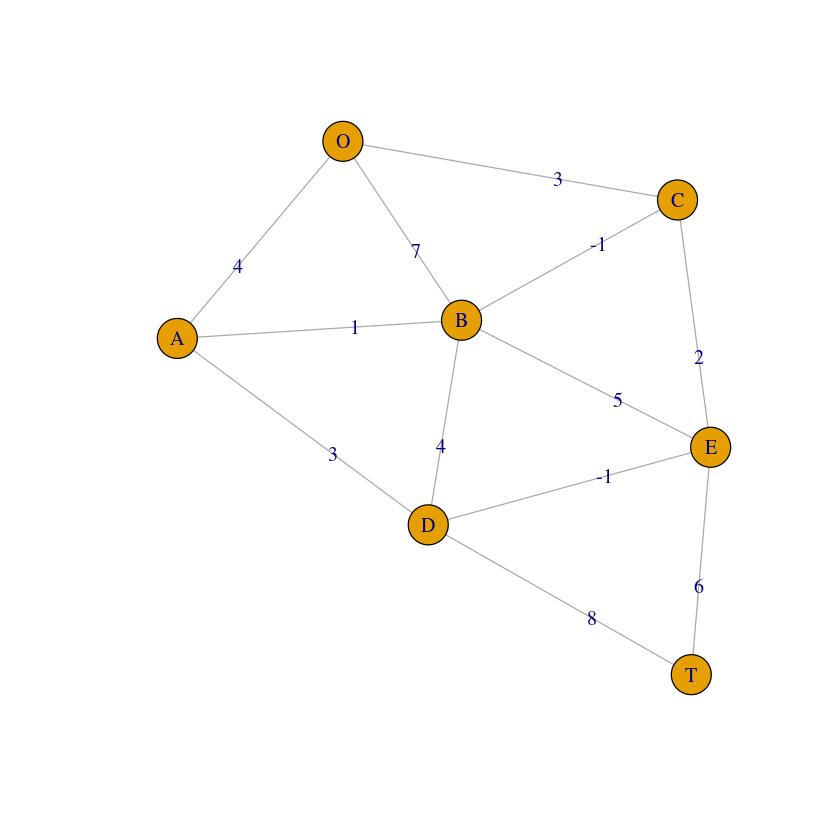

In [6]:
# Lets draw the network with the assigned flows
plot(g, edge.label=flujo$flow)
# and interpret
flujo$flow

# Check in the graph that the represented flows are correct
# a positive flow indicates that flow goes from the smaller vertex id to the bigger one
# a negative flow means that the flow goes from the bigger vertex id to the smaller one
# O -- A, has a positive flow, the direction is from O to A, O->A
# B -- C, has a negative flow, the direction is from C to B, C->B
# 
# Remember that the net flow in each transshipment vertex shuld be zero 
# Input_Flow - Output_Flow = 0
# Lets take a look at B
# Input flow = 9, coming from
# O->B: 7
# A->B: 1
# C->B: 1
# Output flow = 9
# B->D: 4
# B->E: 5
# 
# Test all other transshipment nodes, be careful intrepreting the negative 
# results in the edge flows